# Exploratory Data Analysis

## Load Required Libraries

In [1]:
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For data importing
import os

In [2]:
## (Optional chunk)
# Current session information
import session_info
session_info.show(dependencies=False)

## Load data

Files of interest:
- `weir_calibration.csv` includes calibration points for the weir
- `bci_lutzweir_combined.csv` includes raw runoff measurement, corrected runoff measurement, data source (*Chart measurements can be removed)
- `bci_cl_ra_elect2.CSV` has corrected rainfall (`ra`) in mm with measurements of `0` as `NA`s (`bci_cl_ra_elect.csv` has `0`s)
- `bci_lutz_deep_gsm_man.csv`, `bci_lutz_shallow_gsm_man.csv` have soil moisture measurements (water by wet weight and water by dry weight; one can be chosen for analysis as they are linearly related)
<!-- `bci_cl_ra_elect.csv` has corrected rainfall (`ra`) in mm, contains `0`s (large file) -->

All values level values are in mm, and datetime is in UTC-5 (Panama time zone).


### Import

In [3]:
## Calibrations dataset
data_calibrations = pd.read_csv(
    "data/weir_calibration.csv",
    # nrows = 10000,
    usecols = ['datetime', 'weir_level'], # weir_hour is a repeat of the time in datetime and can be skipped
    parse_dates=['datetime'],
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
    # dtype = {'datetime': 'datetime', 'weir_level': 'int'}
)

data_calibrations.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6465 entries, 1994-01-03 08:46:00 to 2025-09-02 08:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   weir_level  6465 non-null   int64
dtypes: int64(1)
memory usage: 101.0 KB


In [4]:
# Combined data
# # Checking if the dataset is already loaded into the workspace
# try:
#     if data_combined.empty == False:
#         print("Data loaded, random sample shown below")
#         print(data_combined.sample(n=5))
# except NameError:
#     print("Data has not yet been read in, loading now...")
#     data_combined = pd.read_csv(
#         "data/bci_lutzweir_combined.csv",
#         usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_combined = pd.read_csv(
    "data/bci_lutzweir_combined.csv",
    usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
    parse_dates=['datetime'],
    dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

data_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3951119 entries, 1972-01-01 01:00:00 to 1977-03-06 23:45:00
Data columns (total 6 columns):
 #   Column    Dtype   
---  ------    -----   
 0   level     float64 
 1   raw       float64 
 2   chk_note  category
 3   chk_fail  object  
 4   comment   object  
 5   source    category
dtypes: category(2), float64(2), object(2)
memory usage: 158.3+ MB


In [5]:
# rainfall

# This data set includes the 0 readings
# data_rainfall_zeroes = pd.read_csv(
#         "data/bci_elect_cl_ra/bci_cl_ra_elect.csv",
#         usecols = ['datetime', 'ra', 'raw', 'chk_note', 'chk_fail'],
#         # "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
#         # usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'chk_note':'category', 'chk_fail':'str'},
#         # dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_rainfall = pd.read_csv(
    "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
    parse_dates=['datetime'],
    dtype = {'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

data_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179640 entries, 1929-01-02 08:00:00 to 2025-08-04 11:55:00
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ra        179640 non-null  float64 
 1   raw       179640 non-null  float64 
 2   chk_note  179640 non-null  category
 3   chk_fail  29 non-null      object  
dtypes: category(1), float64(2), object(1)
memory usage: 5.7+ MB


In [6]:
# soil

# `bci_lutz_deep_gsm_man.csv`, `bci_lutz_shallow_gsm_man.csv`

pd.read_csv("data/bci_manual_soilh/bci_lutz_shallow_gsm_man.csv", nrows=20)

data_soil_shallow = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_shallow_gsm_man.csv",
    parse_dates=['date'],
    # nrows=10,
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)


data_soil_deep = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_deep_gsm_man.csv",
    parse_dates=['date'],
    # nrows=10,
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

# print(data_soil_shallow['sample'].value_counts(dropna = False))
# print(data_soil_shallow['depth'].value_counts(dropna = False))
# print(data_soil_deep['depth'].value_counts(dropna = False))
# print(data_soil_deep['sample'].value_counts(dropna = False))

data_soil_shallow.info()
data_soil_deep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18556 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       18556 non-null  category
 1   sample      18556 non-null  category
 2   h2o_by_wet  18556 non-null  float64 
 3   chk_note    18556 non-null  category
 4   chk_fail    178 non-null    object  
dtypes: category(3), float64(1), object(1)
memory usage: 490.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15637 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       15637 non-null  category
 1   sample      15637 non-null  category
 2   h2o_by_wet  15637 non-null  float64 
 3   chk_note    15637 non-null  category
 4   chk_fail    20 non-null     object  
dtypes: category(3), float64(1), object(1)
memory usage: 413.4+ KB


## Cleanup

In [ ]:
# Get earliest and latest dates of sources
cat_source = data_combined['source'].unique().tolist()
# print(cat_source)
for cat in cat_source:
    if pd.isna(cat) == True:
        temp_subset = data_combined[data_combined["source"].isnull()]
    else:
        temp_subset = data_combined[data_combined["source"]==cat]
    print(min(temp_subset['datetime']), "", max(temp_subset['datetime']), cat)

# Save space, remove no longer needed items
del cat_source, cat, temp_subset

In [70]:
print(data_combined.dtypes)
print("Source:", data_combined['source'].cat.categories.tolist())
print("Notes:", data_combined['chk_note'].cat.categories.tolist())
print("Fail mode:", data_combined['chk_fail'].unique())
print("Comments:", data_combined['comment'].unique())

level        float64
raw          float64
chk_note    category
chk_fail      object
comment       object
source      category
dtype: object
Source: ['CHART', 'CHART+AF', 'ISCO', 'ESTIMATED', 'RADAR', 'TROLL']
Notes: ['adjusted', 'good', 'missing', 'nc', 'bad']
Fail mode: [nan 'Gap Fill' 'Obstruction' 'Calibration' 'Spike'
 'Calibration, Calibration' 'Gap Fill, Gap Fill'
 'Obstruction, Obstruction' 'Obstruction, Calibration' 'Spike, Spike'
 'Gap Fill, Gap Fill, Gap Fill' 'Gap Fill, Gap Fill, Gap Fill, Gap Fill'
 'Obstruction, Step' 'Step' 'Spike, Obstruction'
 'Calibration, Spike, Obstruction' 'Calibration, Obstruction'
 'Obstruction, Calibration, Obstruction'
 'Calibration, Calibration, Obstruction'
 'Calibration, Calibration, Calibration' 'Calibration, Spike'
 'Obstruction, Obstruction, Calibration'
 'Obstruction, Obstruction, Obstruction, Calibration' 'Spike, Calibration'
 'Obstruction, Spike, Calibration' 'Weir Cleaning, Calibration'
 'Weir Cleaning, Weir Cleaning, Weir Cleaning, We

## General Variable Exploration

In [71]:
data_combined_nochart = data_combined[~data_combined['source'].str.contains("CHART", na=False)]
data_combined_nochart = data_combined_nochart.sort_index()

In [76]:
# counts of each 'source' type
# print(data_combined_nochart['chk_note'].value_counts(dropna = False))
# print(data_combined_nochart['comment'].value_counts(dropna=False))
# print(data_combined_nochart['source'].value_counts(dropna = False))
print(
    data_combined_nochart['source'].value_counts(dropna = False),
    data_combined_nochart['chk_note'].value_counts(dropna = False),
    data_combined_nochart['comment'].value_counts(dropna=False),
    sep="\n\n"
)
# print(data_combined_nochart['source'].value_counts(dropna = False))

source
ISCO         1656120
RADAR         702704
NaN           525298
TROLL           1428
ESTIMATED        290
CHART+AF           0
CHART              0
Name: count, dtype: int64

chk_note
good        1807126
adjusted     728443
nc           333964
missing       16306
bad               1
Name: count, dtype: int64

comment
NaN             2885824
Data missing         16
Name: count, dtype: int64


In [ ]:
data_combined_nochart

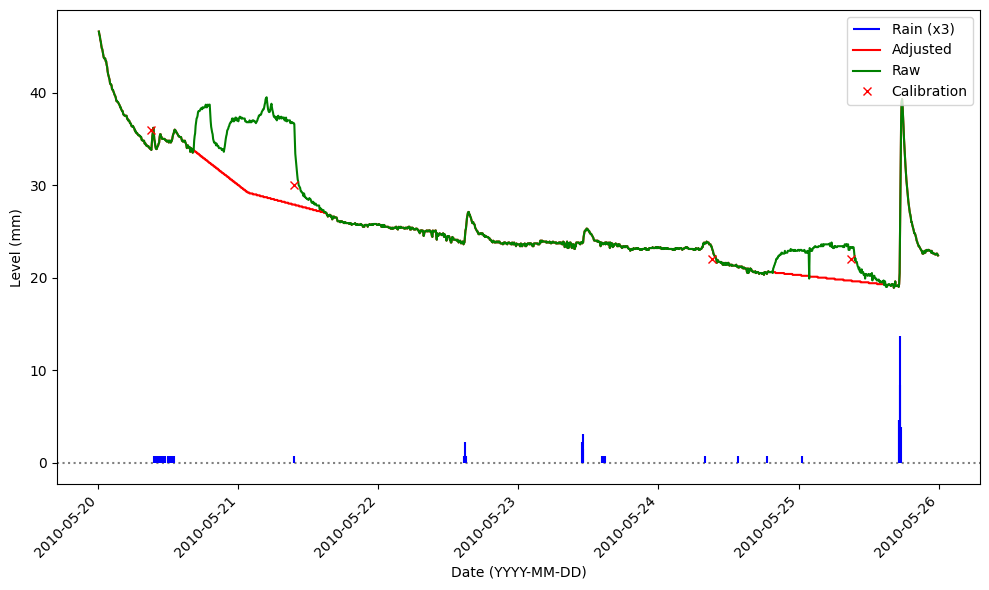

In [ ]:
def plot_between(input_date_start, input_date_end):
    data_subset = data_combined_nochart.loc[input_date_start:input_date_end]
    data_subset_rain = data_rainfall.loc[input_date_start:input_date_end]
    data_subset_cal = data_calibrations.loc[input_date_start:input_date_end]
    # plt.figure(figsize = (10,6))
    # plt.plot(data_subset.index, data_subset['raw'])

    fig, ax = plt.subplots(figsize=(10, 6))
    # ax.figure(figsize=(10, 6))
    plt.axhline(y=0, color = "grey", linestyle = ":")
    ax.vlines(data_subset_rain.index, ymin=0, ymax=data_subset_rain['ra']*3, color = "blue", label = "Rain (x3)")
    ax.plot(data_subset.index, data_subset['level'], color = "red", label = "Adjusted")
    ax.plot(data_subset.index, data_subset['raw'], color = "green", label = "Raw")
    ax.plot(data_subset_cal.index, data_subset_cal['weir_level'], linestyle='none', marker='x', color="red", label = "Calibration")
    # plt.plot(data_subset_rain.index, data_subset_rain['ra']*3, color = "blue", linestyle='none', marker='o')
    # plt.plot(data_calibrations.index, data_calibrations['level'], color = "red")
    ax.set_xlabel('Date (YYYY-MM-DD)')
    ax.set_ylabel('Level (mm)')
    # ax.set_title('Simple Time Series Plot')
    # ax.set_ylim(bottom=0) 
    # ax.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(loc = 'upper right')
    return plt.show()

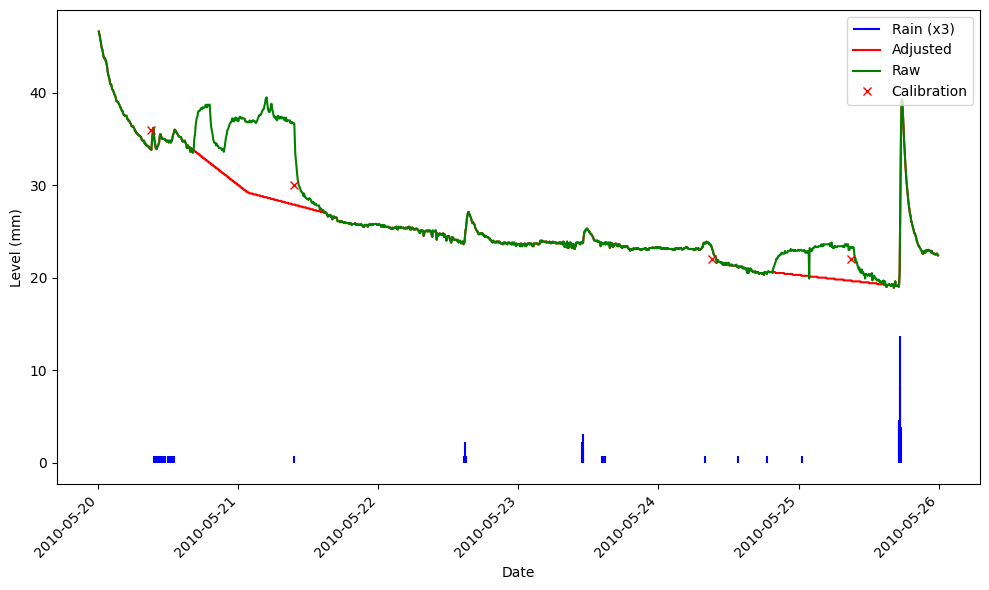

In [87]:
plot_between('2010-05-20 00:00:01','2010-05-25 23:59:59')
# plot_between('2020-05-31 00:00:01','2020-06-16 23:59:59')

In [72]:
# print('chk_note:', data_combined_sources['chk_note'].cat.categories.tolist())
# print('chk_fail:', data_combined_sources['chk_fail'].cat.categories.tolist())
# print('source:', data_combined_sources['source'].cat.categories.tolist())

# data_combined_sources[data_combined_sources['source']=='TROLL']
# data_combined_sources.T['source']
# data_combined_sources.sample(10)["source"]

# counts of each 'source' type
print(data_combined['chk_note'].value_counts(dropna = False))
print(data_combined['comment'].value_counts(dropna=False))
print(data_combined['source'].value_counts(dropna = False))

# data_combined.info()


chk_note
good        2730307
adjusted     867014
nc           336129
missing       17668
bad               1
Name: count, dtype: int64
comment
NaN                                                                         3950937
Original data missing. Copied from 17/07/2013 (had a similar rain event)        103
Original data missing. Copied from 22/09/2013 (had a similar rain event)         63
Data missing                                                                     16
Name: count, dtype: int64
source
ISCO         1656120
CHART+AF      752435
RADAR         702704
NaN           525298
CHART         312844
TROLL           1428
ESTIMATED        290
Name: count, dtype: int64


In [ ]:
# data_combined.loc[data_combined['source']='CHART']
# print(data_combined.loc[data_combined['source'] == 'CHART']) # Selects rows where column 'A' is greater than 1
# data_combined.loc[data_combined['source'].isin(['CHART', 'CHART+AF'])]
# len(data_combined['source'].isin(['CHART', 'CHART+AF']).index.tolist())
# data_combined['source']